In [20]:
import pandas as pd

# Substitua pelo caminho correto
data = pd.read_csv("student-mat.csv", sep=';')

data.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [21]:
# Identificar valores únicos por coluna
print(data.nunique())


school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


In [22]:
# Verificar dados ausentes
print(data.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [23]:
data.fillna(method='ffill', inplace=True)  # Exemplo simples de preenchimento


C:\Users\nicolas.freitas\AppData\Local\Temp\ipykernel_18320\1795879808.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Exemplo simples de preenchimento


In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
                    'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
                    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

X_categorical = encoder.fit_transform(data[categorical_cols])
X_categorical = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_cols))


In [25]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
X_numeric = data[numeric_cols]

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_cols)


In [26]:
X = pd.concat([X_numeric_scaled.reset_index(drop=True), X_categorical.reset_index(drop=True)], axis=1)
y = data['G3']  # Variável alvo


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [29]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
      'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_
y_pred_rf_best = best_model_rf.predict(X_test)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

evaluate_model(y_test, y_pred_lr, "Regressão Linear")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Regressão Linear - MAE: 1.6466656197147507, RMSE: 2.3783697847961367, R²: 0.7241341236974022
Random Forest - MAE: 1.180506329113924, RMSE: 1.9574867637814943, R²: 0.8131311583783953


C:\Users\nicolas.freitas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nicolas.freitas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


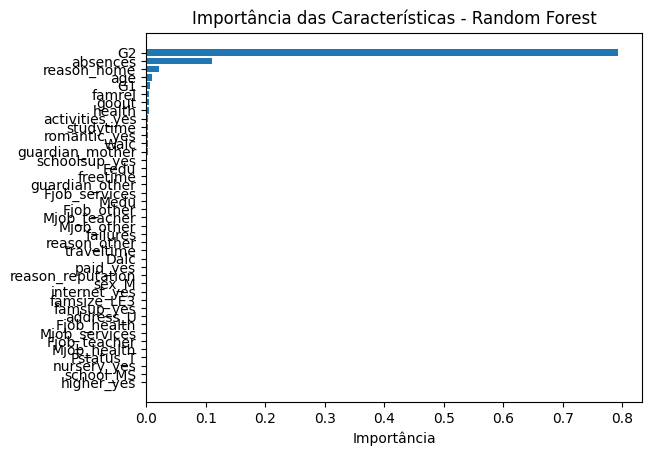

In [32]:
import matplotlib.pyplot as plt
feature_importances = model_rf.feature_importances_
sorted_indices = feature_importances.argsort()

plt.barh(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Importância")
plt.title("Importância das Características - Random Forest")
plt.show()


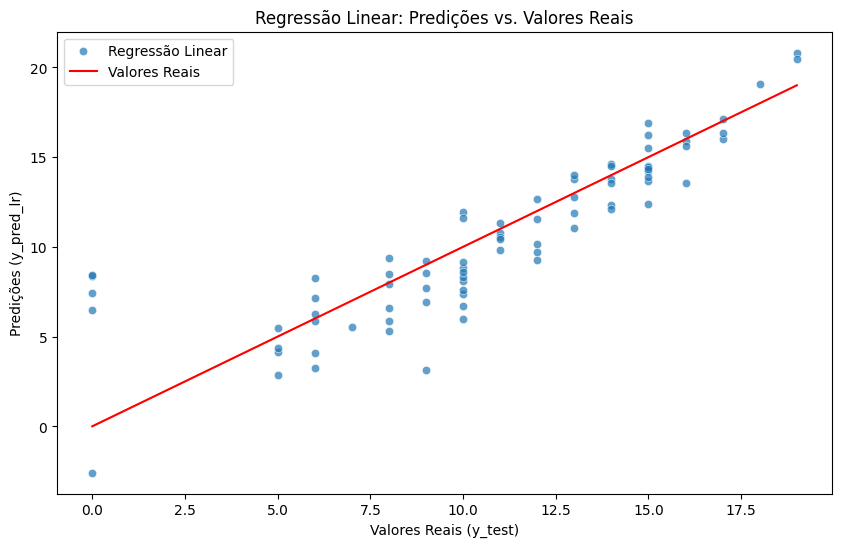

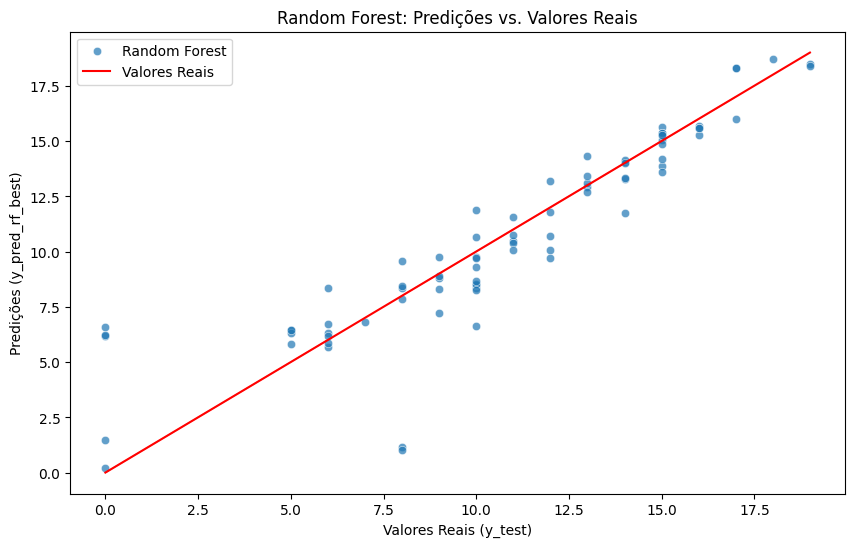

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão para o modelo de Regressão Linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7, label='Regressão Linear')
sns.lineplot(x=y_test, y=y_test, color='red', label='Valores Reais')  # Linha de referência
plt.title("Regressão Linear: Predições vs. Valores Reais")
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Predições (y_pred_lr)")
plt.legend()
plt.show()

# Gráfico de dispersão para o modelo de Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf_best, alpha=0.7, label='Random Forest')
sns.lineplot(x=y_test, y=y_test, color='red', label='Valores Reais')  # Linha de referência
plt.title("Random Forest: Predições vs. Valores Reais")
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Predições (y_pred_rf_best)")
plt.legend()

C:\Users\nicolas.freitas\AppData\Local\Temp\ipykernel_18320\3996697251.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importância"], y=feature_importances.index, palette='viridis')


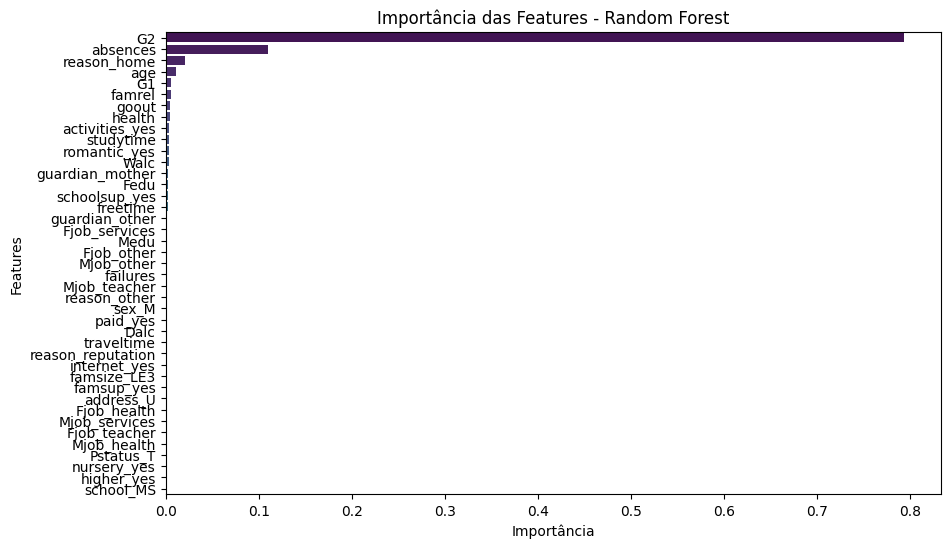

In [34]:
# Importância das Features
import pandas as pd

feature_importances = pd.DataFrame(
    best_model_rf.feature_importances_,
    index=X.columns,
    columns=["Importância"]
).sort_values(by="Importância", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importância"], y=feature_importances.index, palette='viridis')
plt.title("Importância das Features - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()

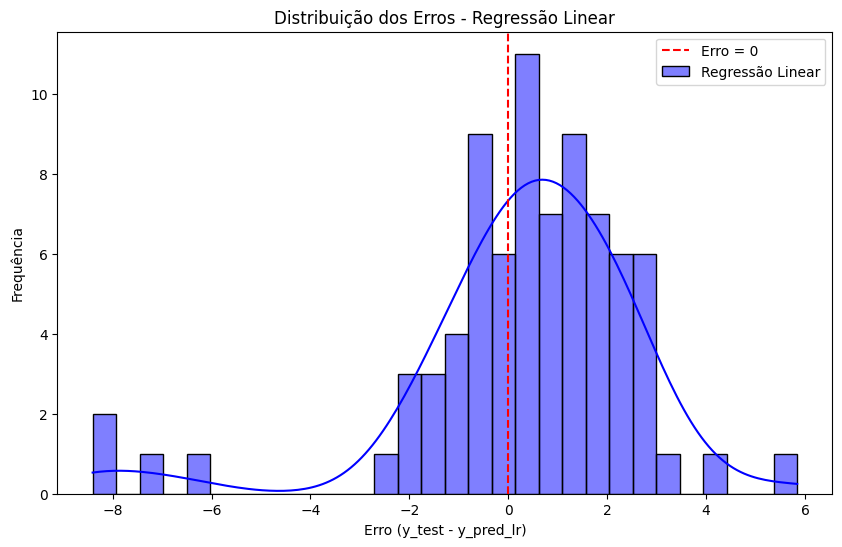

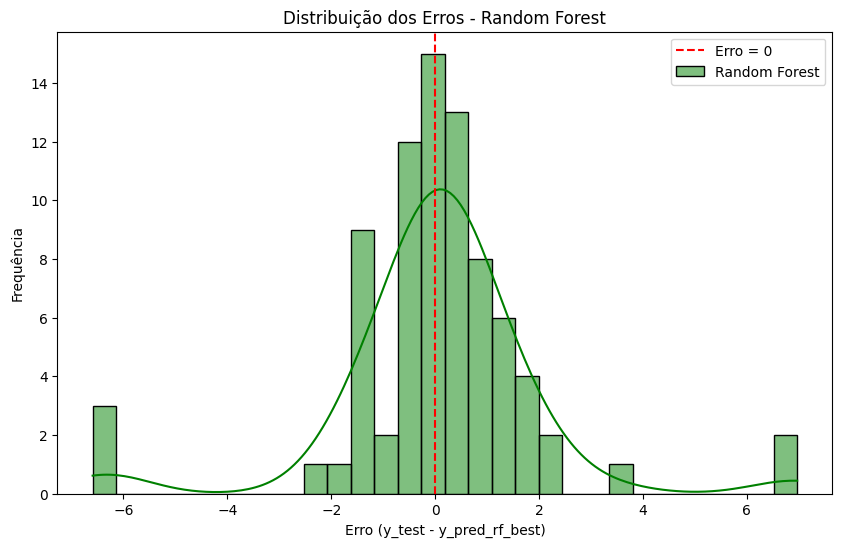

In [35]:
# Resíduos (erros) da Regressão Linear
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, kde=True, bins=30, color='blue', label='Regressão Linear')
plt.axvline(0, color='red', linestyle='--', label='Erro = 0')
plt.title("Distribuição dos Erros - Regressão Linear")
plt.xlabel("Erro (y_test - y_pred_lr)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

# Resíduos (erros) do Random Forest
residuals_rf = y_test - y_pred_rf_best

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, bins=30, color='green', label='Random Forest')
plt.axvline(0, color='red', linestyle='--', label='Erro = 0')
plt.title("Distribuição dos Erros - Random Forest")
plt.xlabel("Erro (y_test - y_pred_rf_best)")
plt.ylabel("Frequência")
plt.legend()
plt.show()


In [38]:
import numpy as np

def make_prediction(input_data, scaler, encoder, model):
    # Separar os dados numéricos e categóricos
    numeric_data = np.array([input_data[col] for col in numeric_cols]).reshape(1, -1)
    categorical_data = np.array([[input_data[col] for col in categorical_cols]])
    
    # Escalar os dados numéricos
    numeric_data_scaled = scaler.transform(numeric_data)
    
    # Transformar os dados categóricos
    categorical_data_encoded = encoder.transform(categorical_data)
    
    # Combinar os dados processados
    final_input = np.hstack([numeric_data_scaled, categorical_data_encoded])
    
    # Fazer a previsão
    prediction = model.predict(final_input)
    return prediction[0]


In [39]:
import pickle

# Salvar o modelo treinado
with open('modelo.pkl', 'wb') as file:
    pickle.dump('student-mat-pred', file)

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!
